In recent times, most of the conversations going around in the country is centered around COVID-19. The conversation easily being, 'Have you seen the numbers of infected cases in this state or that state?'. Often looking at these numbers is intimidating. In fact, the numbers are growing so fast that it is very hard to comprehend them. This is the case with any exponential growth. When we are at the middle of a exponential growth like in the case of spread of COVID-19 virus, it is very hard to say where we are headed to. Obviously, this does not mean that the number of infected cases will keep on growing forever. It will eventually flatten - either because of the entire population being infected or because we have contained the spread of the disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

### Plot Exponential Growth curve of COVID-19 infections in India & South Korea

In [2]:
df = pd.read_csv('D:/Jupyter Notebook/COVID-19-master/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
def DataTransform(df,country):
    df_slt = df[df['Country/Region']==country]
    df_slt = df_slt.transpose().reset_index().loc[4:]
    df_slt.columns = ['Date','Confirmed']
    df_slt['Date'] = pd.to_datetime(df_slt['Date'])
    
    return df_slt.reset_index(drop=True)

In [4]:
def plot(df_slt):
    figure = plt.subplots(1,1,figsize=(15,8))
    sns.pointplot(df_slt['Date'],df_slt['Confirmed'])
    plt.xticks(rotation=90)
    plt.grid()
    plt.show()
    
    

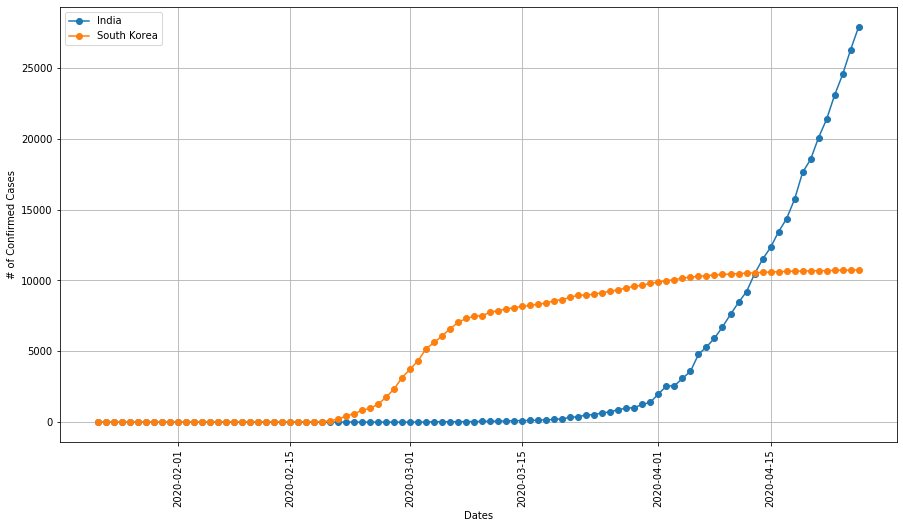

In [5]:
df1 = DataTransform(df,'India')
df2 = DataTransform(df,'Korea, South')

figure = plt.subplots(1,1,figsize=(15,8))
plt.plot(df1['Date'],df1['Confirmed'],marker='o')
plt.plot(df2['Date'],df2['Confirmed'],marker='o')
plt.legend(['India','South Korea'])
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Dates')
plt.ylabel('# of Confirmed Cases')
plt.show()

Therefore, Atish Batia came up with the idea of creating a new graph. The graph shows exactly where a state is at in the growth trajectory of the COVID-19 infections. 

<ul>	<li>The first idea is to <b>plot the graph in logarithmic scale</b>. Since logarithmic scale is the natural scale of any epidemic, it will project a straight line in the graph which is easier for us humans to understand. Also, it scales up smaller numbers and scales down larger numbers making it easier to compare states with difeerent numbers of infected cases.</li>

<li>The second idea is to <b>focus on the change in number of infected cases instead of the absolute number of cases</b>. To see if a state is leaving the tractory we can take a look at the number of cases detected in a day. The falling number of new cases detected might be an indicator of slowdown in the growth. But as a caution we should look for additional number of days to ensure if there is any resurgence. </li>
	
<li>The third idea is <b>not to plot the number of cases against time</b> as the spread of virus does not depend on time. The spread instead depends on the current number of infections and the rate of transmission.</li>
    
</ul>

### Plot New Growth trajectory curve of COVID-19 infections in India & South Korea

In [6]:
df_ind = DataTransform(df,'India')
df_kor = DataTransform(df,'Korea, South')

In [7]:
def delta(df):
    old = 0 
    new = 0
    df['delta']  = 0

    for i in range(1,len(df)):
        new = df.iloc[i]['Confirmed']
        old = df.iloc[i-1]['Confirmed']
        d = new - old
        df['delta'].iloc[i] = d
        
        
    return df

In [8]:
df_ind = delta(df_ind)
df_kor = delta(df_kor)

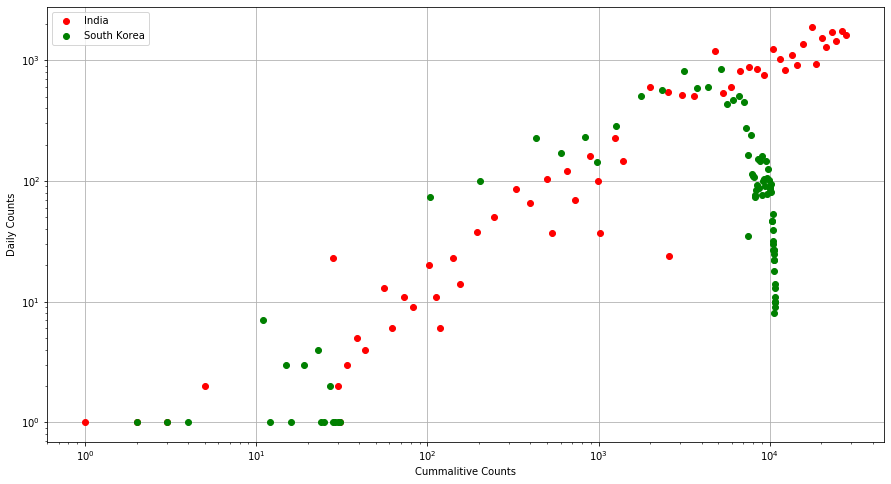

In [9]:
fig = plt.subplots(1,1,figsize=(15,8))
plt.plot(df_ind['Confirmed'],df_ind['delta'],'ko',color='red')
plt.plot(df_kor['Confirmed'],df_kor['delta'],'ko',color='green')
plt.legend(['India','South Korea'])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Daily Counts')
plt.xlabel('Cummalitive Counts')
plt.grid()
plt.show()

### Plot New Growth trajectory curve of COVID-19 infections in Indian state of Uttar Pradesh and Kerala

In [10]:
def ImportData():
    print('Loading Data...')
    raw_df = pd.read_csv('./Raw_Data_28042020.csv')
    
    print('\nRows: '+str(raw_df.shape[0])+'\nColumns: '+str(raw_df.shape[1]))
    return raw_df

In [11]:
def FeatureEngineering(df):
    df['Hospitalized'] = np.where(df['Current Status']=='Hospitalized',1,0)
    df['Recovered'] = np.where(df['Current Status']=='Recovered',1,0)
    df['Deceased'] = np.where(df['Current Status']=='Deceased',1,0)
    
    df_grpd = df.groupby(['Date Announced','Detected State']).agg({'Hospitalized': 'sum', 'Recovered':'sum', 'Deceased':'sum'}).reset_index()

    df_grpd['Date Announced'] = pd.to_datetime(df_grpd['Date Announced'],format='%d/%m/%Y')
    df_grpd.sort_values(by='Date Announced',inplace=True)
    
    return df_grpd

In [12]:
def ChooseState(df,name):
    df = df[df['Detected State']==name]
    
    return df

In [13]:
def Accumulator(df_grpd):
    df_grpd['Hospitalized_c'] = None
    c=0
    a=0
    for i in range(0,len(df_grpd['Hospitalized'])):
        a = df_grpd.iloc[i]['Hospitalized']
        c=c+a
        df_grpd['Hospitalized_c'].iloc[i] = c
    
    print('Hospitalised: {}'.format(c))

    df_grpd['Recovered_c'] = None
    c=0
    a=0
    for i in range(0,len(df_grpd['Recovered'])):
        a = df_grpd.iloc[i]['Recovered']
        c=c+a
        df_grpd['Recovered_c'].iloc[i] = c
        
    print('Recovered: {}'.format(c))


    df_grpd['Deceased_c'] = None
    c=0
    a=0
    for i in range(0,len(df_grpd['Deceased'])):
        a = df_grpd.iloc[i]['Deceased']
        c=c+a
        df_grpd['Deceased_c'].iloc[i] = c
        
    print('Deceased: {}'.format(c))
        
    return df_grpd

Loading Data...

Rows: 27891
Columns: 20
Hospitalised: 408
Recovered: 58
Deceased: 3
Hospitalised: 8054
Recovered: 3
Deceased: 11


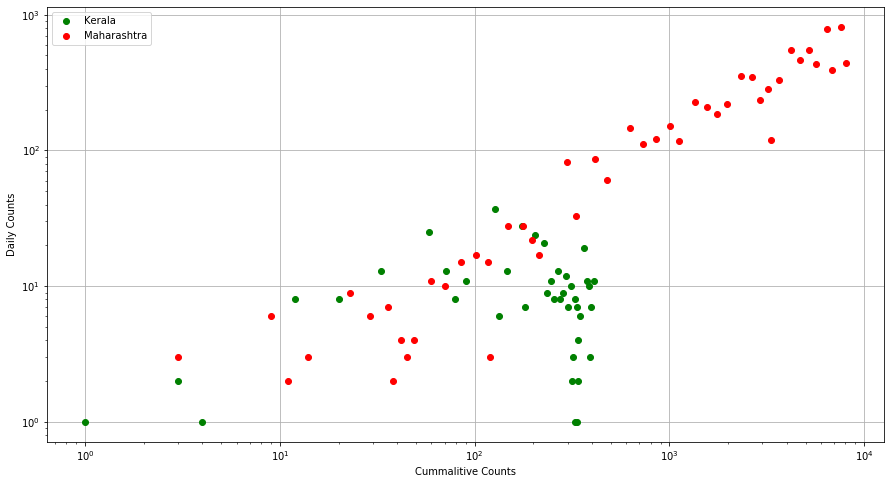

In [14]:
df = ImportData()
df_grpd = FeatureEngineering(df)

df_KL = ChooseState(df_grpd,'Kerala')
df_MH = ChooseState(df_grpd,'Maharashtra')

df_KL = Accumulator(df_KL)
df_MH = Accumulator(df_MH)

fig = plt.subplots(1,1,figsize=(15,8))
plt.plot(df_KL['Hospitalized_c'],df_KL['Hospitalized'],'ko',color='green')
plt.plot(df_MH['Hospitalized_c'],df_MH['Hospitalized'],'ko',color='red')
plt.legend(['Kerala','Maharashtra'])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Daily Counts')
plt.xlabel('Cummalitive Counts')
plt.grid()
plt.show()

The resulting graph shows us where we are on the trajectory of the spread. As time passes by the state under study might grow following a strainght line. But as soon as the spread is slowing down the curve rapidly deviates and drops from the straight line.

#### Caveats or Limitations:

1. Logarithmic Scale distorts therefore it look like as if 10000 cases is quite close to 1000 cases which might lead to someone not taking the spread seriously.
	1.1 Having log scale on x-axis often makes it harder to find resurgence of cases.<br>
2. The actual number of cases is not reflected in the detected cases. The numbers we are seeing is dependent on number of testing. <br>
3. Data Limitation. The data used in this study is crowdsourced. Different countries have different methods of data collection. Also, Health Care systems are over burdened. 

<B> References: </B>

1. https://aatishb.com/covidtrends/
2. MinutePhysics: https://www.youtube.com/watch?v=54XLXg4fYsc
3. 3Blue1Brown: https://www.youtube.com/watch?v=54XLXg4fYsc

4. Data: <br>
    4.1 Global Data: John Hopkins University : https://github.com/CSSEGISandData/COVID-19<br>
    4.2 India Data: https://api.covid19india.org/